In [98]:
import pandas as pd

review_data=pd.read_csv('amazon/preprocessed_kindle_review .csv')
review_data.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [70]:
review_data.shape

(12000, 4)

In [71]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12000 non-null  int64 
 1   rating      12000 non-null  int64 
 2   reviewText  12000 non-null  object
 3   summary     12000 non-null  object
dtypes: int64(2), object(2)
memory usage: 375.1+ KB


In [72]:
#checking null values 
review_data.isnull().sum()

Unnamed: 0    0
rating        0
reviewText    0
summary       0
dtype: int64

In [7]:
review_data['reviewText'].duplicated().any()

False

In [73]:
#no need for id  and summary for the problem 
review_data=review_data.drop(columns=['summary','Unnamed: 0'])

In [74]:
review_data.head()

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."


18715
13


Text(0.5, 1.0, 'average no. of words in reviews vs. ratings ')

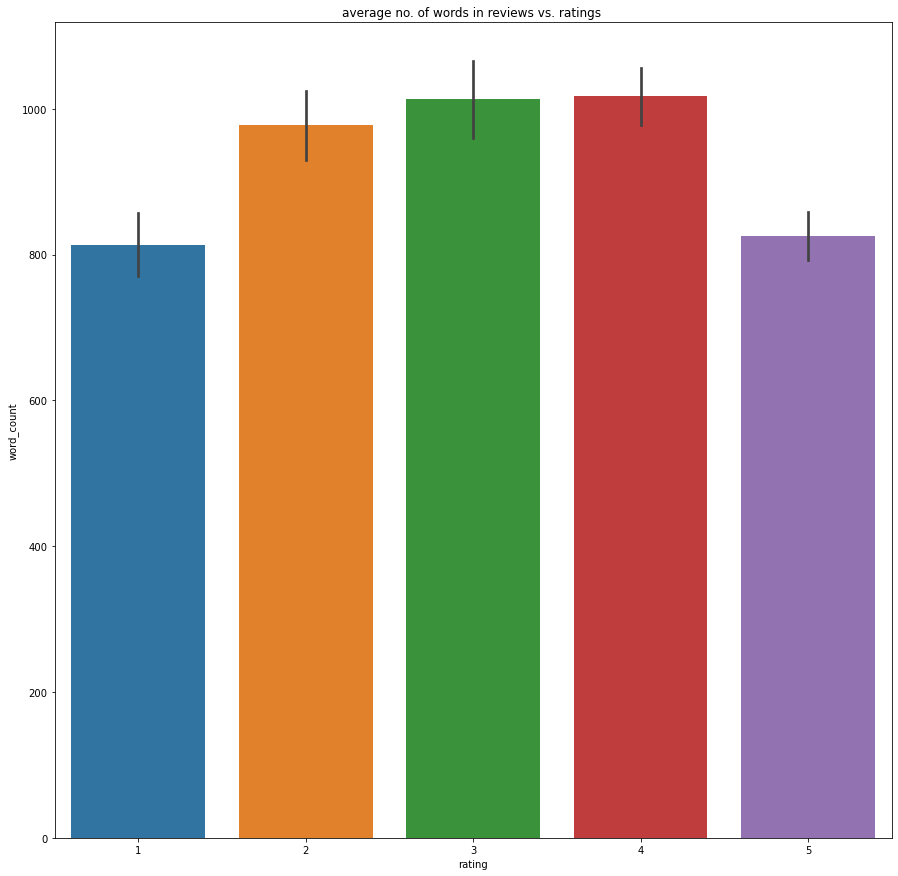

In [99]:
#check the size of reviewText 
import matplotlib.pyplot as plt
import seaborn as sns

review_data['word_count']=review_data['reviewText'].apply(lambda x:len(str(x.split())))
print (review_data['word_count'].max())
print (review_data['word_count'].min())

plt.figure(figsize=(15,15))
sns.barplot(x='rating',y='word_count',data=review_data)
plt.title('average no. of words in reviews vs. ratings ')

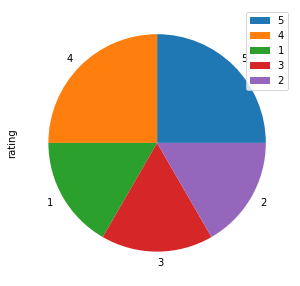

In [100]:
# no gap between text vs. rating 
# will check the precentage of each review relative to the whole dataset 
review_data.rating.value_counts()
df = pd.DataFrame(review_data.rating.value_counts())
plot = df.plot.pie(y='rating', figsize=(5, 5))

In [77]:
#checking on the most frequent n-gram of review with each rating 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word' ,sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(review_data.reviewText).toarray()
features.shape

from sklearn.feature_selection import chi2
import numpy as np
all_rating=[1,2,3,4,5]
N=2
for label in sorted(all_rating):
  features_chi2 = chi2(features, review_data.rating == label)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(label))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


# '1':
  . Most correlated unigrams:
. deleted
. waste
  . Most correlated bigrams:
. don waste
. waste time
# '2':
  . Most correlated unigrams:
. loved
. didn
  . Most correlated bigrams:
. did finish
. finish book
# '3':
  . Most correlated unigrams:
. ok
. okay
  . Most correlated bigrams:
. ok read
. just okay
# '4':
  . Most correlated unigrams:
. liked
. enjoyed
  . Most correlated bigrams:
. good read
. enjoyed book
# '5':
  . Most correlated unigrams:
. wonderful
. loved
  . Most correlated bigrams:
. wait read
. highly recommend


In [78]:
#for sentiment analaysis we will consider 1 2 3 as 0 - negative review and 4 5 as 1 for postivity 

# Converting 1,2,3 to 0 
# Converting 4,5 to 1

review_data.rating=review_data.rating.replace([1,2,3],0)
review_data.rating=review_data.rating.replace([4,5],1)

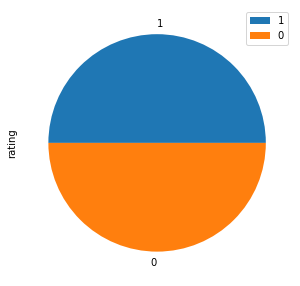

In [79]:
#replotting after changing ratings 
review_data.rating.value_counts()
df = pd.DataFrame(review_data.rating.value_counts())
plot = df.plot.pie(y='rating', figsize=(5, 5))

In [80]:
review_data.head()

,rating,reviewText,word_count
0,1,This book was the very first bookmobile book I...,482
1,0,"When I read the description for this book, I c...",3223
2,1,I just had to edit this review. This book is a...,3772
3,1,I don't normally buy 'mystery' novels because ...,564
4,1,"This isn't the kind of book I normally read, a...",603


In [81]:
#save the dataframe contains the review_Data
review_data.to_csv('book_review.csv')

In [82]:
features.shape

(12000, 18945)

In [102]:
#adjust parameters to decrease feature size remove 2 grames from tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word' , min_df=5, encoding='latin-1', stop_words='english')
features = tfidf.fit_transform(review_data.reviewText).toarray()
features.shape

(12000, 9089)

In [103]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def preprocess(text):
   # f = open(filename,'r')
   # text = f.read()
    text = text.lower()
    
    text_p = "".join([char for char in text if char not in string.punctuation])
    
    words = word_tokenize(text_p)
    
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
    
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]
    
    
    lemma =[wordnet_lemmatizer.lemmatize(word, pos="v") for word in filtered_words]
    #pos = pos_tag(filtered_words)
    mystr =' '.join(lemma)
    return  mystr

In [104]:
review_data['word_lemma']=review_data['reviewText'].apply(lambda x:preprocess(x))

In [105]:
review_data.head()

,Unnamed: 0,rating,reviewText,summary,word_count,word_lemma
0,0,5,This book was the very first bookmobile book I...,50 + years ago...,482,book first bookmobile book buy school book clu...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,3223,read description book couldnt wait read downlo...
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!,3772,edit review book believe get right update rewr...
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.,564,dont normally buy mystery novels dont like how...
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!,603,isnt kind book normally read although try limi...


In [87]:
mystr  = preprocess(review_data['reviewText'][1])


In [106]:
print('mystr:', (mystr))


mystr: When I read the description for this book, I couldn't wait to read it. Once I downloaded it to my Kindle, I found it extremely hard to keep reading it.  To be honest, I stopped reading halfway through the book. It began slow and remained a slow, uninteresting read.  It lacked passion; not making love passion, but passion for life. Neither Jada or Aaron were interesting characters and the story was too, too `everything is perfect'.  Everybody is just so understanding and accommodating--the bit of drama with his father and her grandmother was blah.  To give an example of what I mean (and there are MANY), Aaron finally finds out almost  half way into the book that he fathered a child 5 years ago--keep in mind that Aaron and Jada kept in contact for a few months after he left and she never mentioned to him that she was pregnant. When she finally tells him he has a son, Aaron becomes overwhelmed with emotions (misty eyed) knowing that he's a father. WTH!  I think most men would be up

In [107]:
mystr  = (review_data['reviewText'][1])
print('mystr:', (mystr))

mystr: When I read the description for this book, I couldn't wait to read it. Once I downloaded it to my Kindle, I found it extremely hard to keep reading it.  To be honest, I stopped reading halfway through the book. It began slow and remained a slow, uninteresting read.  It lacked passion; not making love passion, but passion for life. Neither Jada or Aaron were interesting characters and the story was too, too `everything is perfect'.  Everybody is just so understanding and accommodating--the bit of drama with his father and her grandmother was blah.  To give an example of what I mean (and there are MANY), Aaron finally finds out almost  half way into the book that he fathered a child 5 years ago--keep in mind that Aaron and Jada kept in contact for a few months after he left and she never mentioned to him that she was pregnant. When she finally tells him he has a son, Aaron becomes overwhelmed with emotions (misty eyed) knowing that he's a father. WTH!  I think most men would be up

In [108]:
review_data['word_lemma_count']=review_data['word_lemma'].apply(lambda x:len((x.split())))


In [109]:
review_data.head()

,Unnamed: 0,rating,reviewText,summary,word_count,word_lemma,word_lemma_count
0,0,5,This book was the very first bookmobile book I...,50 + years ago...,482,book first bookmobile book buy school book clu...,26
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!,3223,read description book couldnt wait read downlo...,181
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!,3772,edit review book believe get right update rewr...,238
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.,564,dont normally buy mystery novels dont like how...,34
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!,603,isnt kind book normally read although try limi...,40


In [110]:
print (review_data['word_lemma_count'].max())
print (review_data['word_lemma_count'].min())

1134
1


In [93]:
#adjust parameters to decrease feature size remove 2 grames from tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word' , min_df=5, encoding='latin-1', stop_words='english')
features = tfidf.fit_transform(review_data.word_lemma).toarray()
features.shape

(12000, 7543)

In [94]:
#save lemma based review file to be used in our model 
review_data.to_csv('book_review_lemma.csv')

In [112]:
report=review_data.drop(columns=['summary','Unnamed: 0'])

In [113]:
report.head()

,rating,reviewText,word_count,word_lemma,word_lemma_count
0,5,This book was the very first bookmobile book I...,482,book first bookmobile book buy school book clu...,26
1,1,"When I read the description for this book, I c...",3223,read description book couldnt wait read downlo...,181
2,5,I just had to edit this review. This book is a...,3772,edit review book believe get right update rewr...,238
3,5,I don't normally buy 'mystery' novels because ...,564,dont normally buy mystery novels dont like how...,34
4,5,"This isn't the kind of book I normally read, a...",603,isnt kind book normally read although try limi...,40
